K-Means for the Image segmentation

In [1]:
from PIL import Image
import numpy as np
file_path = "sawako.jpeg"
image = np.asarray(Image.open(file_path))

In [2]:
image.shape

(675, 450, 3)

In [3]:
X = image.reshape(-1, 3)
X.shape

(303750, 3)

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=0).fit(X)

In [5]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

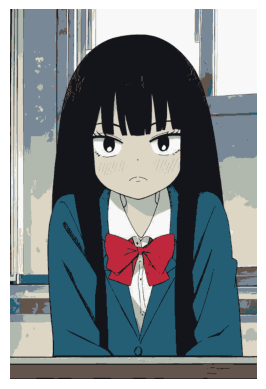

In [6]:
import matplotlib.pyplot as plt

plt.imshow(segmented_img.astype(np.uint8))
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, _ = make_moons(n_samples=200, noise=0.05, random_state=0)
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.2)

In [8]:
dbscan.labels_

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1], dtype=int64)

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

NameError: name 'mglearn' is not defined

## Gaussian Mixture Model

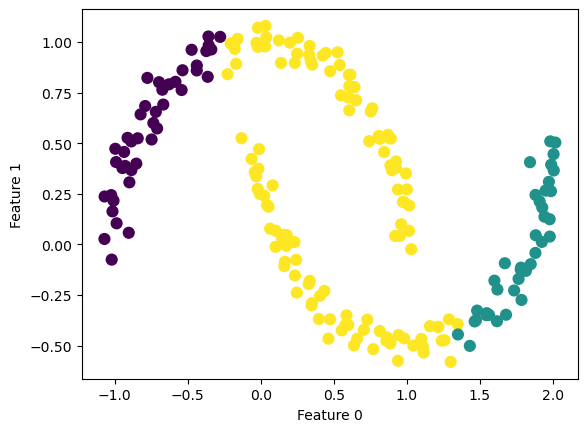

In [10]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Try soft cluster with the predict_proba

In [11]:
gmm.predict_proba(X).round(3)

array([[0.   , 0.   , 1.   ],
       [0.   , 0.964, 0.036],
       [0.   , 0.   , 1.   ],
       [0.999, 0.   , 0.001],
       [0.   , 0.993, 0.007],
       [0.   , 0.997, 0.003],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.002, 0.998],
       [0.621, 0.   , 0.379],
       [0.   , 0.   , 1.   ],
       [0.   , 0.995, 0.005],
       [0.   , 0.011, 0.989],
       [0.995, 0.   , 0.005],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.95 , 0.   , 0.05 ],
       [0.   , 0.998, 0.002],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.083, 0.917],
       [0.6  , 0.   , 0.4  ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.996, 0.004],
       [0.   , 0.999, 0.001],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.034, 0.   , 0.966],
       [0.   , 0.   , 1.   ],
       [0.

In [12]:
densities = gmm.score_samples(X)
density_threshold = np.percentile(densities, 2)
anomalies = X[densities < density_threshold]

In [13]:
gmm.bic(X)

629.6703914374308

In [14]:
gmm.aic(X)

573.5989962061142

## Bayesian Gaussian Mixture Model

auto find your n_components for the GMM.

In [15]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

array([0.23, 0.19, 0.27, 0.14, 0.17, 0.  , 0.  , 0.  , 0.  , 0.  ])

## Olivetti faces with clustering

In [18]:
from sklearn.datasets import fetch_openml

olivetti_faces = fetch_openml('olivetti_faces', version=1)
faces_data = olivetti_faces.data
faces_target = olivetti_faces.target

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces_data, faces_target, test_size=0.2, random_state=42)

# validation split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
import numpy as np

# Prepare the data
X = faces_data
y = faces_target

# Perform stratified sampling
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train KMeans clustering
    kmeans = KMeans(n_clusters=40, random_state=42)
    kmeans.fit(X_train)

    # Predict the clusters for the test set
    y_pred = kmeans.predict(X_test)
    print(f"Fold completed. Predicted clusters: {np.unique(y_pred)}")

Fold completed. Predicted clusters: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 21 22 23 27 28
 29 30 33 34 35 37 38 39]
Fold completed. Predicted clusters: [ 0  1  4  5  6  7  8  9 12 13 14 15 16 17 18 20 21 22 23 24 27 28 29 30
 31 32 33 34 35 36 37 39]
Fold completed. Predicted clusters: [ 0  1  4  5  6  7 10 11 12 13 14 15 16 17 18 19 20 21 23 25 26 27 28 30
 31 32 34 37 38 39]
Fold completed. Predicted clusters: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25
 26 27 28 29 30 34 36 37 39]
Fold completed. Predicted clusters: [ 0  1  3  4  5  8  9 10 12 13 14 15 16 17 18 19 22 23 24 26 27 28 29 30
 31 33 34 36 37 38 39]
